# Airplane Satisfaction Visualization

### In this notebook I will use the Airplane Satisfaction dataset to answer useful questions and gain insight.

## Dataset Description:
This dataset contains information about passengers, including their gender, and age.<br>
It contains information about the flight, such as class,flight distance,delay,etc...<br>
It contains satisfaction ratings from 0-5 on the multiple services provided on each flight.<br>
## Questions:
<ul>
    <li><a href="#average_age">What is the average age of all passengers?</a></li>
    <li><a href="#agevsclass">Do older passengers tend to fly Business rather than Economy ?</a></li>
    <li><a href="#modegender">Which gender is most common among passengers?</a></li>
    <li><a href="#gendervsclass">Which gender tends to fly Business rather than Economy?</a></li>
    <li><a href="#avg_dist">What is the average flight distance?</a></li>
    <li><a href="#distvsclass">Do people tend to fly Business when the flight distance is big ?</a></li>
    <li><a href="#depvsarr">Do flights tend to be more late on departure or arrival ?</a></li>
    <li><a href="#ratevsclass">Are satisfaction ratings higher in Business class than Economy?</a></li>
</ul>

## Import Packages and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
airplanes = pd.read_csv('airline_passenger_satisfaction.csv')

## Data Wrangling & Cleaning
#### The dataset doesnt need alot of cleaning, so I combined the 2 steps to save time and improve readability.

In [3]:
airplanes.head()    #Show first 5 rows of data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
airplanes.shape     #Show number of rows and columns in data   

(129880, 24)

In [5]:
pd.set_option('display.max_rows', 1000)      #Show number of missing values in each column
airplanes.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [6]:
airplanes.duplicated().sum()       #Check for duplicates

0

In [7]:
airplanes.dtypes         #Show datatypes of columns

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [8]:
airplanes.drop(['ID','Customer Type','Gate Location'],axis=1,inplace = True)    #Remove useless columns
airplanes['Arrival Delay'].fillna(0,inplace=True)                               #Fill missing values in column

# Visualizations
### Here I will answer following questions:

<a id='average_age'></a>
## What is the average age of all passengers ?

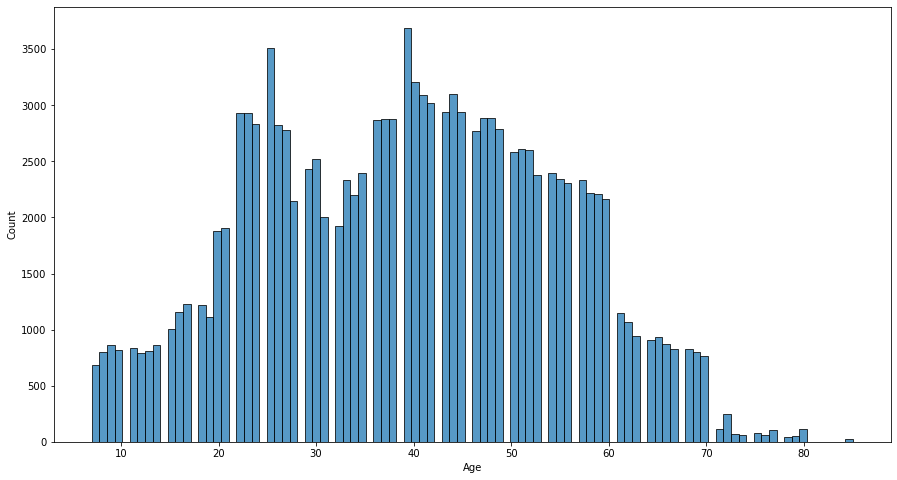

In [9]:
plt.figure(figsize=(15,8))
sns.histplot(x='Age',data = airplanes,bins = 100)       #Histogram to count each age
plt.show()

#### There is a lot of variety in the ages, but it looks like the most frequent passengers are around 40 years old.

<a id='agevsclass'></a>
## Do older passengers tend to fly Business rather than Economy ?

In [10]:
avg_age_eco = airplanes['Age'][airplanes['Class'] == 'Economy'].mean()
avg_age_ecop = airplanes['Age'][airplanes['Class'] == 'Economy Plus'].mean()     #Calculate mean age of each class
avg_age_bis = airplanes['Age'][airplanes['Class'] == 'Business'].mean()
ages=[avg_age_eco,avg_age_ecop,avg_age_bis]             #Store in array                       

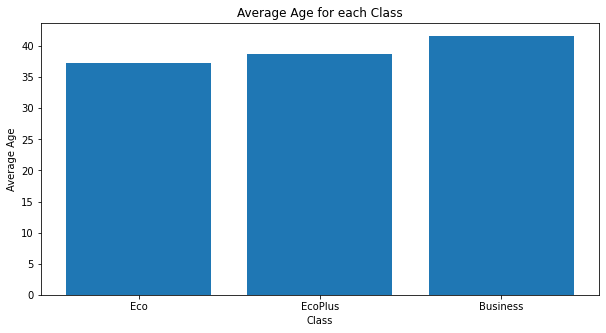

In [23]:
plt.figure(figsize=(10,5))
x=['1','2','3']
tick_label = ['Eco','EcoPlus','Business']
plt.bar(x,ages,tick_label=tick_label)           #Bar chart to compare each mean age

plt.title("Average Age for each Class")
plt.xlabel("Class")
plt.ylabel("Average Age")

plt.show()

#### It seems that older people tend to fly on higher classes.

<a id='modegender'></a>
## Which gender is most common among passengers?

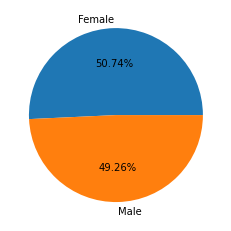

In [12]:
plt.pie(airplanes['Gender'].value_counts(),labels=['Female','Male'],autopct='%0.2f%%')  
plt.show()           #Pie chart to show percentage of each gender

#### Females are the more common gender between passengers.

<a id='gendervsclass'></a>
## Which gender tends to fly Business rather than Economy?

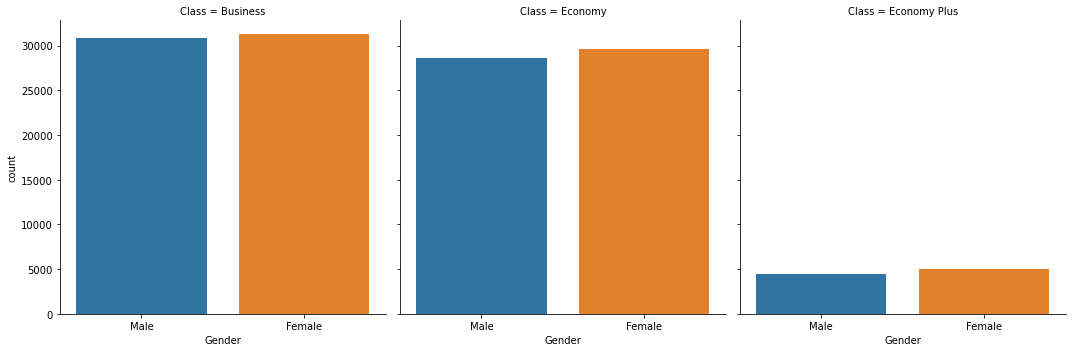

In [13]:
sns.catplot(x='Gender',data =airplanes, col='Class',kind='count')
plt.show()        #Bar chart of gender counts for each class

#### The graphs show that Females are more common in all classes. this may be because there are more females than males in the<br> dataset, so we can say that there is no relation between gender and class type.

<a id='avg_dist'></a>
## What is the average flight distance?

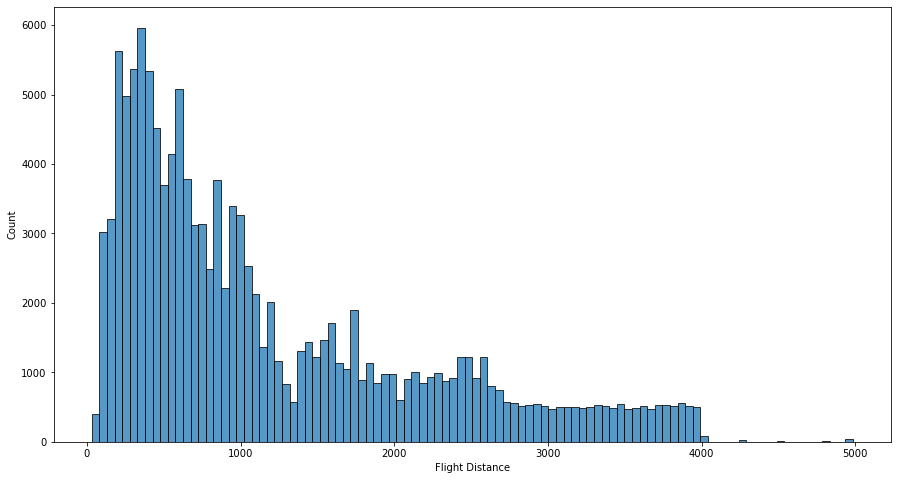

In [14]:
plt.figure(figsize=(15,8))
sns.histplot(x='Flight Distance',data = airplanes,bins = 100) #Histogram to count each flight distance
plt.show()

#### Looks like most flights are between 200 and 1000 (Kilometers? Miles?).

<a id='distvsclass'></a>
## Do people tend to fly Business when the flight distance is big ?

In [15]:
avg_dist_eco = airplanes['Flight Distance'][airplanes['Class'] == 'Economy'].mean()
avg_dist_ecop = airplanes['Flight Distance'][airplanes['Class'] == 'Economy Plus'].mean() #Calculate mean distance in each class
avg_dist_bis = airplanes['Flight Distance'][airplanes['Class'] == 'Business'].mean()
distances =[avg_dist_eco,avg_dist_ecop,avg_dist_bis]  #Store each mean in array

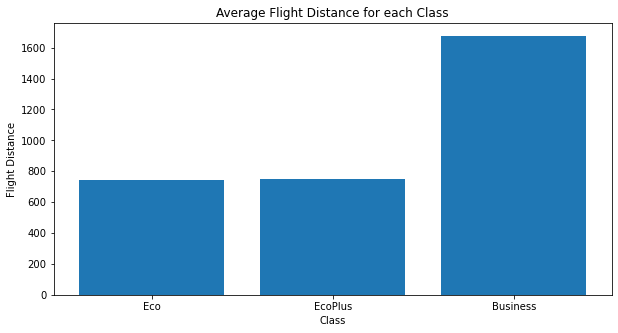

In [24]:
plt.figure(figsize=(10,5))
x=['1','2','3']
tick_label = ['Eco','EcoPlus','Business']
plt.bar(x,distances,tick_label=tick_label)   #Bar chart to compare mean distances

plt.title("Average Flight Distance for each Class")
plt.xlabel("Class")
plt.ylabel("Flight Distance")

plt.show()

#### The flight distance of Business flights seem to be much higher than the other classes.

<a id='depvsarr'></a>
## Do flights tend to be more late on departure or arrival ?

In [17]:
avg_dep = airplanes['Departure Delay'].replace(0,np.nan).mean(skipna=True) #Calculate mean excluding zeroes for accuracy
avg_arr = airplanes['Arrival Delay'].replace(0,np.nan).mean(skipna=True)

late = [avg_dep,avg_arr]  #Store mean in array

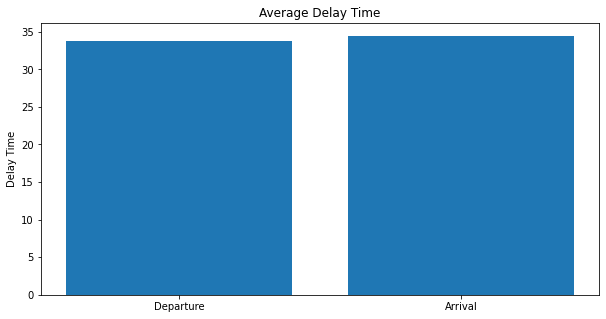

In [25]:
plt.figure(figsize=(10,5))
x=['1','2']
tick_label = ['Departure','Arrival']
plt.bar(x,late,tick_label=tick_label)   #Bar chart to compare the delay times

plt.title("Average Delay Time")
plt.ylabel("Delay Time")

plt.show()

#### The average Arrival delay time seems to be slightly higher than that of Departure.

<a id='ratevsclass'></a>
## Are satisfaction ratings higher in Business class than Economy?

In [19]:
satisfaction_eco = airplanes[airplanes['Class'] == 'Economy'].iloc[:,7:20]    #Separated satisfaction columns from original df
satisfaction_bis = airplanes[airplanes['Class'] == 'Business'].iloc[:,7:20]   #for each class

In [20]:
eco_ratings = []
bis_ratings = []

for column in satisfaction_eco.columns:                     #Calculated and stored mode of each rating in array for each class
    eco_ratings.append(satisfaction_eco[column].mode()[0])
for column in satisfaction_bis.columns:
    bis_ratings.append(satisfaction_bis[column].mode()[0])

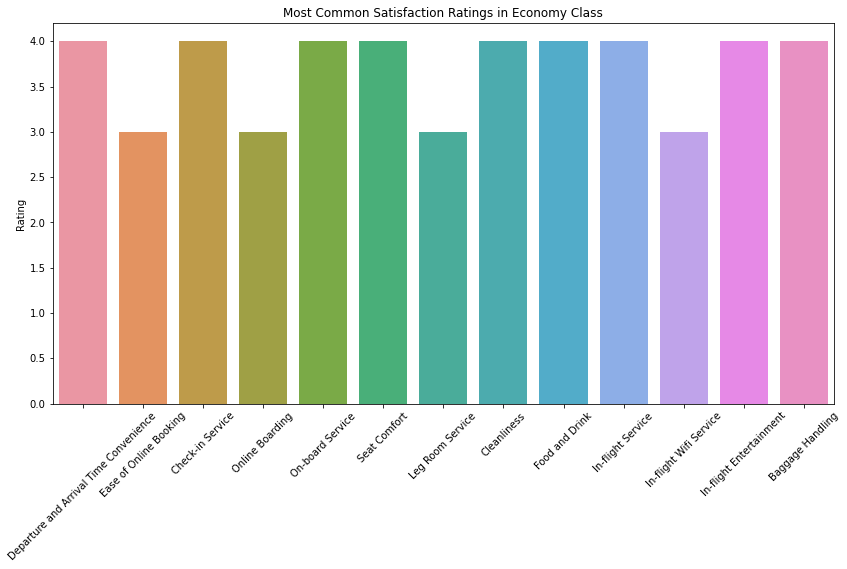

In [27]:
plt.figure(figsize=(14,7))
sns.barplot(x=satisfaction_eco.columns,y=eco_ratings)
plt.title('Most Common Satisfaction Ratings in Economy Class')    #Bar chart to compare satisfaction ratings in Economy class
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14,7))
sns.barplot(x=satisfaction_bis.columns,y=bis_ratings)
plt.xticks(rotation=45)
plt.show()

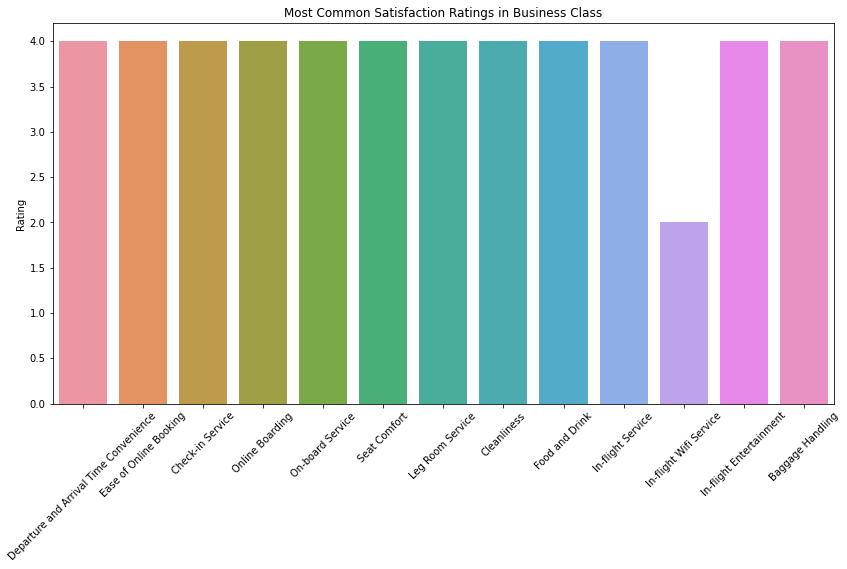

In [28]:
plt.figure(figsize=(14,7))
sns.barplot(x=satisfaction_bis.columns,y=bis_ratings)
plt.title('Most Common Satisfaction Ratings in Business Class')   #Bar chart to compare satisfaction ratings in Business class
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

#### Unsurprisingly,most satisfaction ratings by passengers who fly Business are higher than those who fly Economy<br>,with the wifi satisfaction being the only service with a higher rating in Economy over Business.


## Conclusions
- There is no range of ages that is dominant in the dataset, but it is clear that the most common age is around 40 years old.
- It seems that older people like to fly in Business class more than the other classes.
- Females are the more frequent gender in the dataset.
- It is difficult to say there is a relation between gender and flight class, we cant conclude that one gender prefers Business/Economy over the other gender.
- Flight distances seem to be around 200-1000 (Kilometers/Miles??).
- People seem to fly in business class when the flight distance is high.
- Delay times in Arrival are slightly higher than Departure times.
- Satisfaction ratings are higher in Business flights, but it is worth noting that the wifi service has a higher rating in Economy flights which is surprising.